# Исследовательский анализ данных

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import seaborn as sns

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


Размер выборки.


In [3]:
labels.shape

(7591, 2)

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


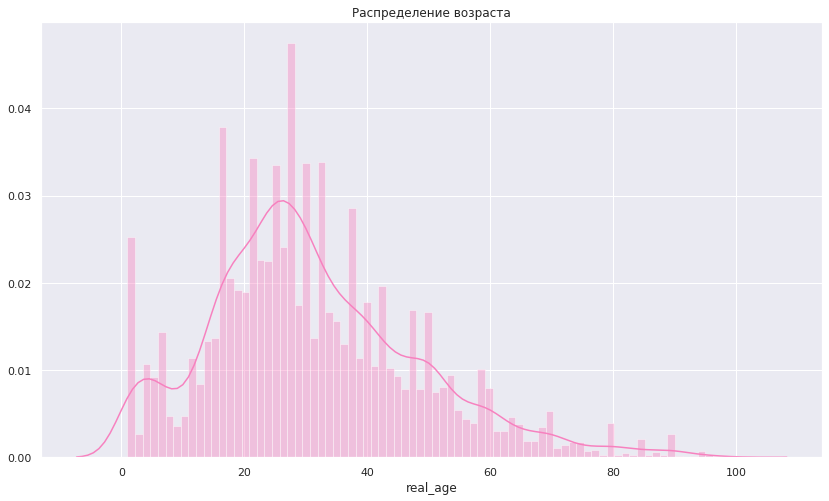

In [8]:
plt.figure(figsize=(14,8))
sns.set(style = 'darkgrid', palette = 'Set1_r')
sns.distplot(labels["real_age"], hist = True, bins=80)
plt.title('Распределение возраста')
display(labels.describe())

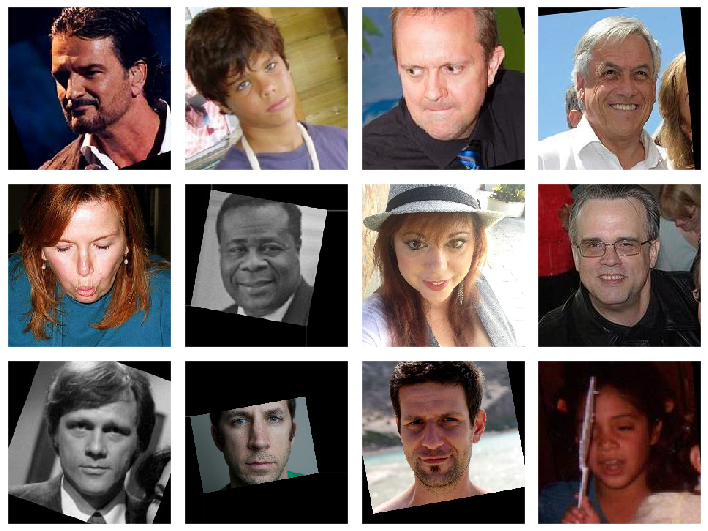

In [10]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Выводы по шагу 1:
- 7591 фотографий/наблюдений в нашей выборке и основное количество приходится на возраст от 20-30
- на некоторых фотографиях присутствуют объекты, которые закрывают лицо
- некоторые фотографии повернуты
- есть цветные фотографии, есть ч/б

В целом, для модели будет продуктивнее наличие самых разных фотографий: пиксельных, с шумами, плохим освещением и т.д. Это может повысить качество работы модели в дальнейшем: у нее будет меньше проблем с определением "проблемных" фотографий. 